## **Network Science Homework 2**
# **PageRank, Communities and Subgraph Patterns**

### **Students:**
- Pedro Azevedo, up201905966@up.pt
- Davi Santos, up202310061@up.pt
- André Regufe, up202107760@up.pt

### Work can be located in [here](https://github.com/wesdpre/Network_Science_projt)

It was use a LLM (Gemini 2.5 Pro Preview 05-06) for help to write the questions and answers in a correct format for the Jupyter Notebook

# **Link Analysis and PageRank**

#### **QUESTION 1.** 

Draw a graph with at least 6 nodes in which one node has a very **high value of PageRank**, although the same node has **low closeness and betweenness centrality** (don’t forget to point out the node).**

**Answer**: 

Consider the following directed graph with 6 nodes:

<div style="text-align: center;">
  <img src="data/Q1/graph6nodes.png" alt="graph with 6 nodes" width="30%" height="20%">
  <p style="font-style: italic; font-size: 0.9em; margin-top: 0.5em;"> Figure 1: Graph with Node A having high PageRank but low Closeness and Betweenness Centrality.</p>
</div>

The target node is **A**.

#### **QUESTION 2.** 

The **damping factor** in PageRank (parameter β, in slides) controls how of often we follow one of the links of the current node vs going to an arbitrary node on the network.
- **(a)** What does β = 0 mean? What would happen to the PageRank values in that case? Why?

**Answer**: 

The equation that governs if the algorithm follows the outgoing licks is
$$
r_i = \sum_{i -> j}{\beta \frac{r_i}{d_i}} + \left( 1 - \beta \right) \frac{1}{n}
$$ 
where $\beta \in [0, 1]$

In this equation the  damping factor $\beta$ represents the probability of following the outgoing edges.

If $\beta = 0$ then the algorithm will always follow to a random page



- **(b)** What does β = 1 mean? Can you explain a possible problem with using that value?

**Answer**: 

As explain in the previous question (a) $\beta$ represents the probability of following the ou going edges, if $\beta = 1$ that means that the algorithm always follow the outgoing edges of the current page.

the problems of this implementation are:
- Dead ends : what happens if there is no more outgoing edges on the current page, if the $\beta = 1$ then the algorithm stops without traversing the entire graph.
- Spider traps : the problem of all out-link are within a group, eventually the Spider trap absorbs all importance.

#### **QUESTION 3.** 
**Implement a program** (in any programming language) for manually computing the (normalized) PageRank values of a small network using **power iterations** (the ”flow” mode). Attach the program to your homework submission with a very short description on how it works.

**Answer**: 

.

In [80]:
import networkx as nx 
import numpy as np
import sys
import os
import random
import json
from networkx.readwrite import json_graph 

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from homeWork1_NS.src.load_save_network import load_network_advanced, save_network_nx, save_graph_network

random.seed(42) 

This Page Rank was created to use as input a networkx.DiGraph graph

we also create a graph to test results 

In [104]:
def my_Page_Rank(graph: nx.DiGraph, beta=0.85, iterations=100, tolerance=1.0e-6, print_iteration=False, print_check=True):
    """
    Computes the PageRank values using power iterations.  (the ”flow” mode)
    
    Args:
        graph (nx.DiGraph): The input directed graph from NetworkX.
        beta (float): The damping factor (probability of following a link).
        iterations (int): The maximum number of iterations to perform.
        tolerance (float): The tolerance for convergence. Iteration stops if the L1 norm
                           of the difference between PageRank vectors in consecutive
                           iterations is less than this.
        print_iteration (bool): If True, prints the PageRank values at each iteration.

    Returns:
        dict: A dictionary with node IDs as keys and their normalized PageRank values as values.
    
    this comment was generated by Gemini 2.5 Pro Preview 05-06
    """
    #Power iterations.  (the ”flow” mode)
    
    nodes = list(graph.nodes())
    N = len(nodes)
    
    if N == 0:
        return {}
    
    if beta < 0 or beta > 1:
        raise ValueError("Damping factor beta must be in the range [0, 1].")
    if iterations <= 0:
        raise ValueError("Number of iterations must be a positive integer.")
    if tolerance <= 0:
        raise ValueError("Tolerance must be a positive number.")
    if not isinstance(graph, nx.DiGraph):
        raise TypeError("Input graph must be a directed graph (nx.DiGraph).")
    
    # First iteration
    final_iteration = 0
    
    # create a page rank list pr
    pr = {node: 1.0 / N for node in nodes}
    
    
    # Ensure all nodes are added, even if isolated after edge directionality
    out_degree = dict(graph.out_degree())
    dangling_nodes = [node for node in nodes if out_degree.get(node, 0) == 0]
    
    if (not print_iteration) and print_check:
        print(f"Computing PageRank with {N} nodes, {len(graph.edges())} edges, and damping factor {beta}.")
        print(f"Total Nodes (N): {N}")
        print(f"Initial PageRank (sample): { {k: v for i, (k,v) in enumerate(pr.items()) if i < 3} }")
        print(f"Dangling Nodes (count): {len(dangling_nodes)}") 
        print(f"Damping Factor (beta): {beta}")
        print("-" * 40)
    
    for iteration in range(1, iterations + 1):
        new_pr = {node: 0.0 for node in nodes}
        iteration_dangling_pr_sum = 0.0
        
        for node in nodes:
            if node in dangling_nodes:
                # Distribute PageRank of dangling nodes evenly
                iteration_dangling_pr_sum += pr[node]
            else:
                # Calculate PageRank contribution from neighbors
                if graph.in_degree(node) > 0:
                    for neighbor in graph.successors(node):
                        new_pr[neighbor] += pr[node] / out_degree[node]
                else:
                    new_pr[node] += 0
        
        for node in nodes:
            dangling_contribution_to_node = iteration_dangling_pr_sum / N 
            new_pr[node] = (1 - beta) / N + beta * (new_pr[node] + dangling_contribution_to_node)
        
        # Check for convergence
        diff = sum(abs(new_pr[node] - pr[node]) for node in nodes)
        pr = new_pr
        
        if print_iteration and print_check:
            print(f"Iteration {iteration}:")
            for node_id in sorted(pr.keys()):
                print(f"  Node {node_id}: {pr[node_id]:.8f}")
            print(f"Diff: {diff:.6e}\n")
            print("-" * 40)
        
        final_iteration = iteration 
        if diff < tolerance:
            if print_check:
                print(f"Converged after {iteration} iterations (L1 Diff: {diff:.6e}).")
            break
    
    # Normalize the PageRank values (final step, mostly for precision)
    total_pr = sum(pr.values())
    if total_pr > 0:
        final_pr = {node: value / total_pr for node, value in pr.items()}
    else:
        final_pr = {node: 0.0 for node in nodes} # Should not happen if N > 0

    if (not print_iteration) and print_check:
        print(f"Final PageRank (the first 3 samples): { {k: v for i, (k,v) in enumerate(final_pr.items()) if i < 3} }")
        print(f"Final PageRank Sum: {sum(final_pr.values()):.6f}")
        print("-" * 40)
        
    return final_pr, final_iteration

Creating a graph to test using watts strogatz graph and converting to a directed graph

In [105]:
# Generate an undirected Watts-Strogatz graph
G = nx.watts_strogatz_graph(n=30, k=4, p=0.3)

# Converting to a directed
Directed_G = nx.DiGraph()
Directed_G.add_nodes_from(G.nodes)
Directed_G.add_edges_from((u, v) if random.random() > 0.5 else (v, u) for u, v in G.edges) # add edges randomly , from u to v 
Directed_G.add_edges_from((a, b) if random.random() > 0.5 else (b, a) for b, a in G.edges) # so that we can have both directions

## start
# Ensure all nodes are added, even if isolated after edge directionality
all_original_nodes = set(G.nodes())
current_digraph_nodes = set(Directed_G.nodes())
if all_original_nodes != current_digraph_nodes:
    Directed_G.add_nodes_from(all_original_nodes - current_digraph_nodes)
## end , this code was completely generated by Gemini 2.5 Pro Preview 05-06

graph_data = json_graph.node_link_data(Directed_G)

# Save the graph using json
with open("data/directed_graph.json", "w") as file: 
    json.dump(graph_data, file)
    
# Save the graph using my custom function for easier reading
save_network_nx(Directed_G, "data/directed_graph_nx.txt")

File data/directed_graph_nx.txt already exists.


Loading the Graph

In [106]:
with open("data/directed_graph.json", "r") as file:
    loaded_data = json.load(file)

Directed_G_loaded = json_graph.node_link_graph(loaded_data, directed=True)

print("Loaded Graph Nodes:", Directed_G_loaded.nodes())
print("Loaded Graph Edges:", Directed_G_loaded.edges())

Loaded Graph Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Loaded Graph Edges: [(0, 29), (0, 20), (0, 7), (0, 1), (0, 28), (0, 24), (1, 0), (1, 26), (1, 2), (2, 1), (2, 21), (3, 1), (3, 2), (3, 21), (3, 4), (3, 5), (4, 3), (4, 5), (4, 6), (5, 3), (5, 4), (5, 6), (6, 4), (6, 8), (6, 11), (7, 5), (7, 9), (7, 28), (7, 10), (7, 0), (7, 22), (8, 17), (8, 6), (8, 10), (9, 8), (9, 10), (9, 7), (9, 11), (10, 8), (10, 11), (10, 9), (11, 9), (11, 12), (11, 23), (11, 6), (11, 10), (12, 13), (12, 11), (12, 14), (13, 15), (13, 14), (14, 12), (14, 13), (14, 16), (15, 14), (15, 13), (15, 17), (16, 14), (16, 15), (16, 23), (17, 15), (17, 16), (17, 8), (18, 20), (18, 19), (19, 17), (19, 18), (19, 20), (20, 22), (20, 0), (21, 19), (21, 22), (22, 7), (22, 24), (22, 21), (23, 24), (23, 16), (24, 0), (24, 25), (24, 22), (24, 23), (25, 26), (25, 24), (25, 27), (26, 27), (26, 1), (27, 25), (27, 28), (27, 29), (28, 0), (28, 29), (28, 7), 

In [107]:
final_pr, final_iteration = my_Page_Rank(Directed_G_loaded, beta=0.85, iterations=100, tolerance=1.0e-6)

Computing PageRank with 30 nodes, 97 edges, and damping factor 0.85.
Total Nodes (N): 30
Initial PageRank (sample): {0: 0.03333333333333333, 1: 0.03333333333333333, 2: 0.03333333333333333}
Dangling Nodes (count): 0
Damping Factor (beta): 0.85
----------------------------------------
Converged after 42 iterations (L1 Diff: 7.905896e-07).
Final PageRank (the first 3 samples): {0: 0.047063715843130655, 1: 0.03861631443321728, 2: 0.019055157788716002}
Final PageRank Sum: 1.000000
----------------------------------------


test our results are similar to the official implementation

In [109]:
n_compare = 5
results = nx.pagerank(Directed_G_loaded, alpha=0.85, max_iter=100, tol=1.0e-6)
for i in range(n_compare):
    print(f"Node {i}: My PageRank = {final_pr[i]:.8f}, NetworkX PageRank = {results[i]:.8f}")

Node 0: My PageRank = 0.04706372, NetworkX PageRank = 0.04706842
Node 1: My PageRank = 0.03861631, NetworkX PageRank = 0.03862056
Node 2: My PageRank = 0.01905516, NetworkX PageRank = 0.01905695
Node 3: My PageRank = 0.01831681, NetworkX PageRank = 0.01831785
Node 4: My PageRank = 0.02633178, NetworkX PageRank = 0.02633324


#### **QUESTION 4.** 
Use your program to **compute the PageRank values** of the following network (with β = 0.85). 

**Show the values of all nodes for each iteration** until the computation converges.

![ex graph](data/Q4/ex_graph.png)

**Answer**: 


In [110]:
newG = nx.DiGraph() 
newG.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
newG.add_edges_from([
    ('A', 'B'),
    ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'),
    ('C', 'D'),
    ('D', 'B'),
    ('E', 'D'),
    ('F', 'G'),
    ('G', 'F'),
])
print("Nodes in newG:", newG.nodes())
print("Edges in newG:", newG.edges())

Nodes in newG: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Edges in newG: [('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('D', 'B'), ('E', 'D'), ('F', 'G'), ('G', 'F')]


In [111]:
final_page, final_iteration = my_Page_Rank(newG, beta=0.85, iterations=100, tolerance=1.0e-7, print_iteration=True) 

Iteration 1:
  Node A: 0.02142857
  Node B: 0.14285714
  Node C: 0.05178571
  Node D: 0.29464286
  Node E: 0.05178571
  Node F: 0.17321429
  Node G: 0.14285714
Diff: 4.857143e-01

----------------------------------------
Iteration 2:
  Node A: 0.02142857
  Node B: 0.27187500
  Node C: 0.05178571
  Node D: 0.13982143
  Node E: 0.05178571
  Node F: 0.17321429
  Node G: 0.16866071
Diff: 3.096429e-01

----------------------------------------
Iteration 3:
  Node A: 0.02142857
  Node B: 0.14027679
  Node C: 0.07920201
  Node D: 0.16723772
  Node E: 0.07920201
  Node F: 0.22256362
  Node G: 0.16866071
Diff: 2.631964e-01

----------------------------------------
Iteration 4:
  Node A: 0.02142857
  Node B: 0.16358064
  Node C: 0.05123739
  Node D: 0.18588080
  Node E: 0.05123739
  Node F: 0.19459900
  Node G: 0.21060765
Diff: 1.677877e-01

----------------------------------------
Iteration 5:
  Node A: 0.02142857
  Node B: 0.17942725
  Node C: 0.05618946
  Node D: 0.14329302
  Node E: 0.0561894

#### **QUESTION 5.** 

Use the program to do computations varying the β parameter from 0.0 to 1.0 in steps of 0.05 and:

In [112]:
import matplotlib.pyplot as plt
beta_values = np.arange(0.0, 1.05, 0.05) # from 0.0 to 1.0 inclusive, step 0.05

- **(a)** Show in a plot the **number of iterations needed until convergence is reached as you change** β. Can you explain what is happening?

**Answer**: 


Beta = 0.00 took 1 iterations.
Beta = 0.05 took 5 iterations.
Beta = 0.10 took 7 iterations.
Beta = 0.15 took 8 iterations.
Beta = 0.20 took 9 iterations.
Beta = 0.25 took 11 iterations.
Beta = 0.30 took 12 iterations.
Beta = 0.35 took 14 iterations.
Beta = 0.40 took 16 iterations.
Beta = 0.45 took 18 iterations.
Beta = 0.50 took 21 iterations.
Beta = 0.55 took 24 iterations.
Beta = 0.60 took 28 iterations.
Beta = 0.65 took 33 iterations.
Beta = 0.70 took 40 iterations.
Beta = 0.75 took 49 iterations.
Beta = 0.80 took 63 iterations.
Beta = 0.85 took 86 iterations.
Beta = 0.90 took 133 iterations.
Beta = 0.95 took 200 iterations.
Beta = 1.00 took 200 iterations.


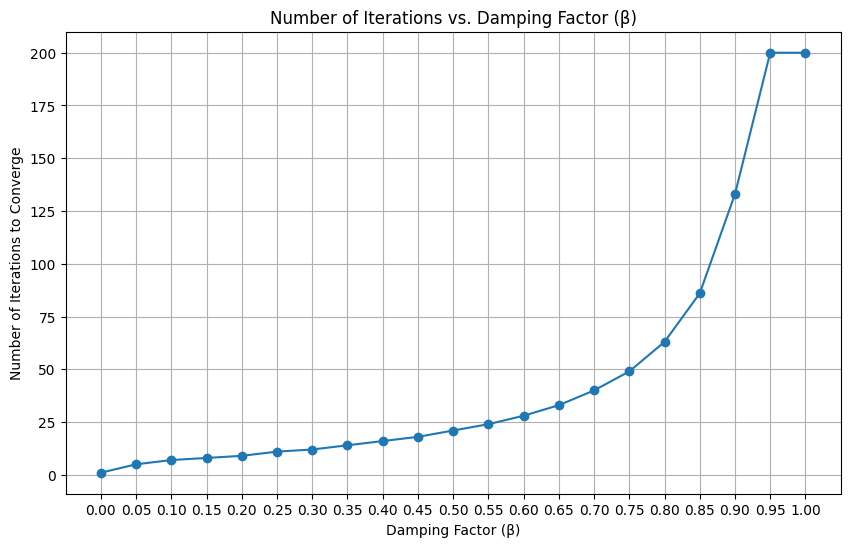

In [113]:
iteration_counts = []

for values in beta_values:
    # We don't need verbose output for each iteration here, just the count
    _, final_iteration = my_Page_Rank(newG, beta=values, iterations=200, tolerance=1.0e-7, print_check=False)
    iteration_counts.append(final_iteration)
    print(f"Beta = {values:.2f} took {final_iteration} iterations.")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(beta_values, iteration_counts, marker='o', linestyle='-')
plt.title('Number of Iterations vs. Damping Factor (β)')
plt.xlabel('Damping Factor (β)')
plt.ylabel('Number of Iterations to Converge')
plt.xticks(beta_values)
plt.grid(True)
plt.show()

- When β is low (close to 0.0), the random jump component dominates
- When β is high (close to 1.0), the algorithm relies more heavily on the link structure 
- β close to 1.0 can be problematic. If there are dangling nodes (pages with no out-links), PageRank "leaks" out of the system unless handled. If there are spider traps, they can absorb all the PageRank. The `my_Page_Rank` function handles dangling nodes by redistributing their PageRank, which mitigates complete leakage for β=1,
- `my_Page_Rank`  doesn't accept 0 or 1

Conclusion:

Since there are spider traps and dangling nodes in the graph ex F and G we can state that the less the random jump component of the equation is prevalent the more interactions are needed to converge


- **(b)** Show in a plot the different **PageRank values of all nodes as your change** β. Can you divide the nodes into different curve behaviors? Can you explain what is happening?

**Answer**: 


PageRanks for beta = 0.00 (sample A, B, C, D, E, F, G): A=0.143, B=0.143, C=0.143, D=0.143, E=0.143, F=0.143, G=0.143
PageRanks for beta = 0.05 (sample A, B, C, D, E, F, G): A=0.137, B=0.144, C=0.138, D=0.152, E=0.138, F=0.146, G=0.144
PageRanks for beta = 0.10 (sample A, B, C, D, E, F, G): A=0.130, B=0.147, C=0.134, D=0.161, E=0.134, F=0.149, G=0.145
PageRanks for beta = 0.15 (sample A, B, C, D, E, F, G): A=0.124, B=0.149, C=0.130, D=0.169, E=0.130, F=0.152, G=0.147
PageRanks for beta = 0.20 (sample A, B, C, D, E, F, G): A=0.118, B=0.153, C=0.125, D=0.175, E=0.125, F=0.155, G=0.149
PageRanks for beta = 0.25 (sample A, B, C, D, E, F, G): A=0.111, B=0.156, C=0.121, D=0.181, E=0.121, F=0.159, G=0.151
PageRanks for beta = 0.30 (sample A, B, C, D, E, F, G): A=0.104, B=0.160, C=0.117, D=0.186, E=0.117, F=0.162, G=0.153
PageRanks for beta = 0.35 (sample A, B, C, D, E, F, G): A=0.098, B=0.164, C=0.112, D=0.191, E=0.112, F=0.167, G=0.156
PageRanks for beta = 0.40 (sample A, B, C, D, E, F, G): 

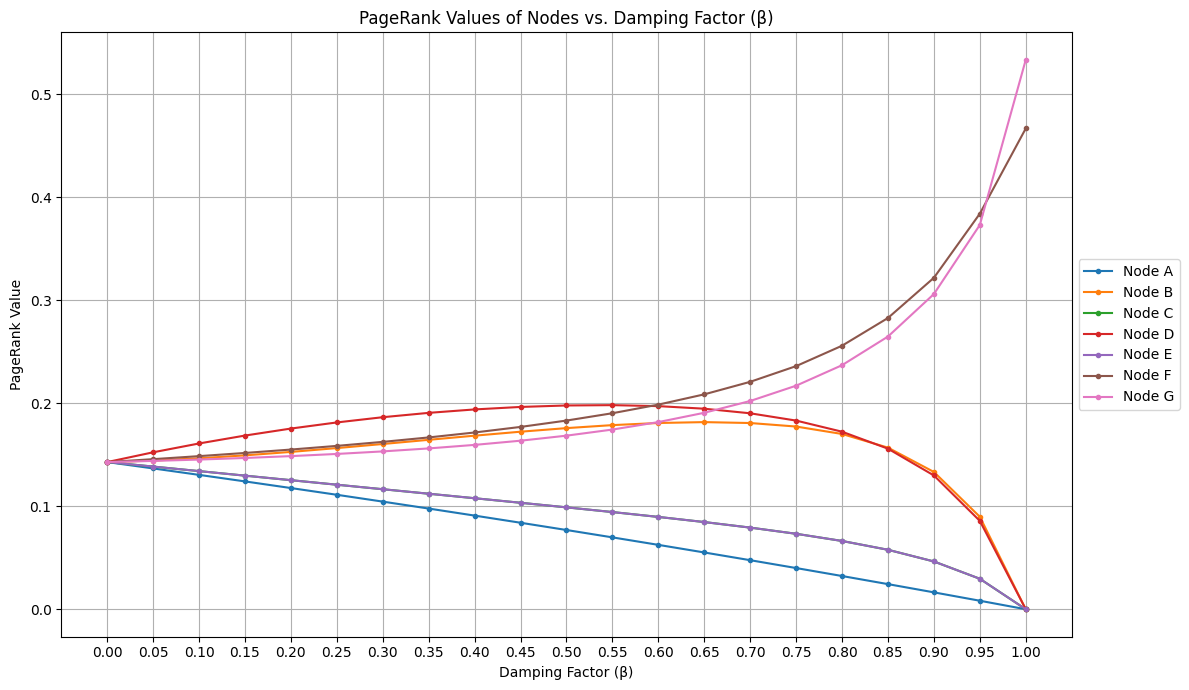

In [118]:
pageRank_results = {node: [] for node in newG.nodes()}

for values in beta_values:
    pr_dict, _ = my_Page_Rank(newG, beta=values, iterations=200, tolerance=1.0e-7, print_check=False)
    for node in newG.nodes():
        pageRank_results[node].append(pr_dict.get(node, 0.0))
    print(f"PageRanks for beta = {values:.2f} (sample A, B, C, D, E, F, G): A={pr_dict.get('A',0):.3f}, B={pr_dict.get('B',0):.3f}, C={pr_dict.get('C',0):.3f}, D={pr_dict.get('D',0):.3f}, E={pr_dict.get('E',0):.3f}, F={pr_dict.get('F',0):.3f}, G={pr_dict.get('G',0):.3f}")
    
# Plotting

plt.figure(figsize=(12, 7))
for node_id in sorted(pageRank_results.keys()): # sorted for consistent legend order
    plt.plot(beta_values, pageRank_results[node_id], marker='.', linestyle='-', label=f'Node {node_id}')

plt.title('PageRank Values of Nodes vs. Damping Factor (β)')
plt.xlabel('Damping Factor (β)')
plt.ylabel('PageRank Value')
plt.xticks(beta_values)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)
plt.tight_layout() 
plt.show()

- **When β = 0.0:** All nodes have (or are very close to) the same PageRank value, equal to 1/N (where N is the number of nodes). This is because the random surfer always teleports to a random page, ignoring the link structure.
- **As β increases towards 1.0:** The link structure becomes more prevalent in the Page Rank calculation.
    - Nodes that are "important" according to the link structure ( many incoming links from other important pages, or part of a structure that accumulates rank) will see their PageRank values increase.
    - Nodes that are less "important" ( few incoming links, or primarily link out to non-reciprocating structures) will see their PageRank values decrease relative to the more important nodes.

In this graph we can also observe the absorption of "importance" by spider trap (F,G),forcing the other nodes to have a lower page rank the more "importance" the spider trap has.



# **Community Discovery**

**QUESTION 6** 

For this exercise you will be asked to analyze a set of undirected networks depicting the **”social networks”** (character co-occurrences in a scene) of **movies**.

You should download the following zip file: [movies.zip](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/movies.zip). It contains:

- Nodes and edges (csv format) for 773 different movies from 1915 to 2012
- a movies.csv file with meta data, indicating which movie name, IMDB id, release year, number of nodes and edges
- A readme file describing the original source of the dataset

Start by opening the files on a text editor to see how they internally look like.

- **QUESTION (a)** 

Select any six networks of the dataset and using Gephi, networkx or any other platform/library, you should run **Louvain Algorithm** to find the best possible communities and **create a table showing**: id of the dataset, name of the movie, number of nodes and edges, number of communities found and modularity for those communities. Give a brief comment on which networks seem to present **community structure**, and why.

**Answer**: 

.

- **QUESTION (b)** 

Choose **any two of the movies** (that are not different chapters of the same universe) and produce **visualizations for the networks**, labeling the nodes with their character names, using colors to represent communities and the size of the nodes to represent PageRank values. Try to make the picture as **aesthetically pleasing** as possible, reinforcing the community structure (and explain how you created the layout). Give a brief **informal description on the meaning of the communities** in the context of the movie (are they what you were expecting? are they meaningful? choose movies that you are familiar with and that you believe should have community structure).

**Answer**: 

.

- **QUESTION (c)** 

**Implement a program** (in any programming language) for manually computing the (normalized) **modularity of a network when given a partition**. Test it on one movie of your choice and the on the partitions you produced on the previous questions (and report if the value seems ok). Attach the program to your homework submission with a very short description on how it works and how I could run it.

The modularity can be computed as:
$$
Modularity = \frac{1} {2 m} \left( \sum_{i,j  \in V} \left(A_{ij} - \frac{K_i K_j} {2 m}\right) \delta\left(C_i, C_j\right) \right) 
$$
Where A is the adjacency matrix of the graph, Ci is the community to which node i belongs, ki is the degree of node i, m is the total number of edges and V is the set of nodes.

**Answer**: 

.

- **QUESTION (d)**

**Implement** (in any programming language) a **simple greedy agglomerative algorithm**: start with each node being a separated community and then do successive iterations in which you try
all possible changes for one node (that is, for each node i ∈ V , try changing its community to all possible communities j ∈ C), and apply the change that produces the best gain in modularity (if there is ties, choose any possible). Attach the program to your homework submission with a very short description on how it works.

Using one of the movies from from the previous questions, make a **plot showing the modularity increase** as you are making more iterations until you reach you a ”local maximum”, and report the communities you found (as a visualization), comparing them to the communities found previously.


**Answer**: 

.

- **QUESTION (e)**

Using your previous program as a basis, explain how could you obtain a **larger quantity of communities**? And how could you obtain **less communities**?

**Answer**: 

.

# **Network Motifs**

**QUESTION 7.** 

For this part of your homework it is highly advisable that you use the [gtrieScanner](http://www.dcc.fc.up.pt/gtries/) tool. You should download, unzip and compile this version: [gtrieScanner_src_01.zip](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/gtrieScanner_src_01.zip) (it is the same as the version online with a newly added ”-raw” option to help you on the homework plus some pre-computed g-tries)


Your first task is to be able to compile the source code. You will need a C++ compiler and make tools. If you have Linux you can simply use g++ and make available on any common distribution. If you use Windows we suggest you use [WSL](https://docs.microsoft.com/en-us/windows/wsl/install) or [Cygwin](https://www.cygwin.com/) to have a shell with Linux-like functionality.

#### **Counting subgraphs**


- **QUESTION (a)**


Consider the following undirected network:

![network_diagram](data/Q7/network_diagram.png)

The frequency (number of occurrences of size 3) of subgraphs of size 3 in this network is:

| Subgraph                                   | Frequency |
| :----------------------------------------: | :-------: |
| <img src="data/Q7/subgraph_p3_image.png" alt="P3 chain" style="height: 1.2em; vertical-align: middle;">| 18        |
| <img src="data/Q7/subgraph_k3_image.png" alt="K3 triangle" style="height: 1.2em; vertical-align: middle;">  | 2         |

You could obtain these results by running (for instance) one of the following commands: 
```
./gtrieScanner -s 3 -m esu -g network.txt -f simple 
./gtrieScanner -s 3 -m gtrie undir3.gt -g network.txt -f simple 
```
supposing that **network.txt** is a text file containing the description of the network as an adjacency list: one line per edge, each line containing two integers separated by a space, the endpoints of the respective edge (the file should have 12 lines, the first of which could be 1 2, for example).

**Your task here is to determine the number of occurrences of all subgraphs of size 4 in this network.** You should put in the report a table like the one shown above (the html version of the output is "broken", so you should produce your own images of the subgraphs)


**Answer**: 

.

#### **A bit of math: subgraphs in purely random networks**
- **QUESTION (b)**

Imagine you have a $G_{np}$ undirected Erd˝os–R´enyi random network. What is its expected number of triangles ( <img src="data/Q7/subgraph_k3_image.png" alt="K3 triangle" style="height: 1.2em; vertical-align: middle;">)? And what about the expected number of chains (<img src="data/Q7/subgraph_p3_image.png" alt="P3 chain" style="height: 1.2em; vertical-align: middle;">)? Justify your answer. 

Note that you can test your theory by generating Erd˝os–R´enyi networks and counting the subgraphs using gtrieScanner, but your answer should be stated as formulas involving $n$ and $p$.


**Answer**: 

.

#### **Back to empirical findings: uncovering motifs in bacteria**
- **QUESTION (c)**

Your task is now to find some network motifs of the transcriptional regulation directed network of the bacteria [Escherichia coli](https://en.wikipedia.org/wiki/Escherichia_coli). Start by downloading the network as a weighted adjacency list: [ecoli.txt](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/ecoli.txt) (each line is an edge in the format start node end node weight)

This directed network is ready for being fed to gtrieScanner. For example you could run:
```
./gtrieScanner -s 3 -d -m gtrie dir3.gt -g ecoli.txt
```
This would compute the frequency of all possible 13 types of size 3 subgraphs, and it should show you that the most frequent one is the following, appearing 250 times:

<img src="data/Q7/subgraph_o3_image.png" alt="P3 chain" style="height: 1.2em; vertical-align: middle;">

Now, if you add the ”-r n” option, it should produce n networks with the same degree sequence and it will you show you how often each subgraph appears on it. For example:
```
./gtrieScanner -s 3 -m gtrie dir3.gt -d -g ecoli.txt -r 500 -raw
```
**Check the results and report on what is the more overrepresented subgraph, including its z-score (Z), frequency on the original network (real), average number of occurrences (avgR) and standard deviation (stdevR)) on the randomized networks**.

The z-score of subgraph i is computed as $Z_i = \frac {(real_i − avgR_i)} {stdevR_i}$ as in ([Milo et al. 2004](https://www.weizmann.ac.il/mcb/UriAlon/sites/mcb.UriAlon/files/uploads/CollectionsOfComplexNetwroks/superfamilies_of_evolved_and_designed_networks.pdf)).

Notice how the most frequent subgraph is not the most significant one. Check if your very simplistic analysis is consistent with the known literature ([Milo et al. 2002](https://www.weizmann.ac.il/plants/Milo/sites/plants.Milo/files/publications/824.full_.pdf)) ([Shen-Orr et al. 2002](http://courses.cms.caltech.edu/cs191/paperscs191/alon2002.pdf)), that is, if the motif you found is also reported (**what is the name given to this motif ?**)


**Answer**: 

.

#### **Characterizing families of networks using motifs**

Start by carefully reading the following paper: 

[Milo et al. ”Superfamilies of evolved and designed networks.” Science 303.5663 (2004)](https://www.weizmann.ac.il/mcb/UriAlon/sites/mcb.UriAlon/files/uploads/CollectionsOfComplexNetwroks/superfamilies_of_evolved_and_designed_networks.pdf) 

The idea here is to perform a very similar analysis, even using some of the same networks!

- **QUESTION (d)**

Download this set of 8 directed networks: networks.zip (inside the zip there is a [README.txt](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/networks.zip) explaining what is each network). **Use gtrieScanner to compute motif fingerprints of all networks. You should produce and include in the report the following:**
-  Plot(s) showing the (normalized) significance profile (SP) of all 13 directed motifs of size 3 for each network. Try to expose the similarity between groups of networks. It should be clear to which subgraph corresponds each data point (ex: see figure 1 of the paper).
- One heat map of 8 × 8 cells showing the correlation between the SPs of all pairs of networks (ex: see figure 2 of the paper).
- A visual description of the main characteristic motifs of each group of networks (that is, you should draw them). Can you give an interpretation on why are they so significant?

You should use at least 100 random networks for each original network and you can opt to ignore subgraphs that occur only once in the original network (attributing a z-score of zero to them).

For normalizing the z-scores use the suggested formula: $ S P_i = \frac{Z_i} { \sqrt{ \sum{} \left( Z^2_i \right)} }$

For the heat map you can use any sofware. R and Python have several possible packages, but even Excel or LibreOffice will suffice (use range conditional formatting). You even have some possible [online alternatives](http://www.heatmapper.ca/). If you know about it, you can even use a clustering algorithm to produce a dendrogram showcasing the relationship between the families of networks.


**Answer**: 

.

- **QUESTION (e)**

**Your task is to find the ”family” of the three ”unknown” networks** given in [unknown.zip](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/unknown.zip) You should justify your answer by computing and plotting their motif significance profiles and
by adding them to the previous heatmap. Each network will clearly belong to one of the groups discovered on the previous question.

**Answer**: 

.